In [2]:
import numpy as np 
import pandas as pd
#import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import hddm

/Users/python2/anaconda/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [54]:
df_firstsess = pd.read_csv('embarc_standard_first_session_clean.csv')

In [55]:
df_trial_merged = pd.read_csv('all_trial_first_session_cleaned_merged.csv')

/Users/mlm2/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (132,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
df_firstsess_mdd = pd.read_csv('standard_mdd_for_shaps.csv')

**t-tests for block/length interaction on rt**

In [65]:
sp.stats.ttest_ind(df_trial_merged[(df_trial_merged.length == 'long') & (df_trial_merged.block == 1)]['rt'],
                   df_trial_merged[(df_trial_merged.length == 'long') & (df_trial_merged.block == 2)]['rt'])

Ttest_indResult(statistic=-0.81559038941586026, pvalue=0.41474114220613656)

In [64]:
sp.stats.ttest_ind(df_trial_merged[(df_trial_merged.length == 'short') & (df_trial_merged.block == 1)]['rt'],
                   df_trial_merged[(df_trial_merged.length == 'short') & (df_trial_merged.block == 2)]['rt'])

Ttest_indResult(statistic=6.303582080473892, pvalue=2.9502625611232702e-10)

**The anova for this is in the R notebook, group * site interaction. F = 3.40, p = .02**

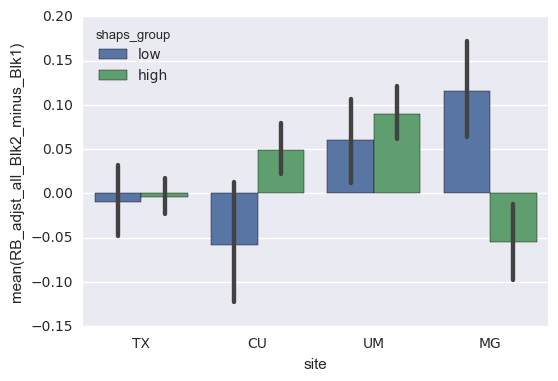

In [57]:
b = sns.barplot(y='RB_adjst_all_Blk2_minus_Blk1', x = 'site', hue = 'shaps_group',data=df_firstsess_mdd, ci=68)

In [60]:
sp.stats.ttest_ind(df_firstsess_mdd[(df_firstsess_mdd.site == 'TX') & (df_firstsess_mdd.shaps_group == 'low')]['RB_adjst_all_Blk2_minus_Blk1'],
                   df_firstsess_mdd[(df_firstsess_mdd.site == 'TX') & (df_firstsess_mdd.shaps_group == 'high')]['RB_adjst_all_Blk2_minus_Blk1'])

Ttest_indResult(statistic=-0.13038035101490986, pvalue=0.89658099118410572)

In [61]:
sp.stats.ttest_ind(df_firstsess_mdd[(df_firstsess_mdd.site == 'CU') & (df_firstsess_mdd.shaps_group == 'low')]['RB_adjst_all_Blk2_minus_Blk1'],
                   df_firstsess_mdd[(df_firstsess_mdd.site == 'CU') & (df_firstsess_mdd.shaps_group == 'high')]['RB_adjst_all_Blk2_minus_Blk1'])

Ttest_indResult(statistic=-1.6258772755553281, pvalue=0.10811560651690312)

In [62]:
sp.stats.ttest_ind(df_firstsess_mdd[(df_firstsess_mdd.site == 'UM') & (df_firstsess_mdd.shaps_group == 'low')]['RB_adjst_all_Blk2_minus_Blk1'],
                   df_firstsess_mdd[(df_firstsess_mdd.site == 'UM') & (df_firstsess_mdd.shaps_group == 'high')]['RB_adjst_all_Blk2_minus_Blk1'])

Ttest_indResult(statistic=-0.46752223287927913, pvalue=0.64219890158557813)

In [63]:
sp.stats.ttest_ind(df_firstsess_mdd[(df_firstsess_mdd.site == 'MG') & (df_firstsess_mdd.shaps_group == 'low')]['RB_adjst_all_Blk2_minus_Blk1'],
                   df_firstsess_mdd[(df_firstsess_mdd.site == 'MG') & (df_firstsess_mdd.shaps_group == 'high')]['RB_adjst_all_Blk2_minus_Blk1'])

Ttest_indResult(statistic=2.2899571089523745, pvalue=0.027113457055702322)

## HDDM stuff

**Looking at just the rich trials**

In [4]:
rich = hddm.load_csv('hddm_all_rich.csv')
rich['rt'] = rich['rt'] / 1000
rich.rt.head()

0    0.704
1    0.456
2    0.490
3    0.481
4    0.553
Name: rt, dtype: float64

In [5]:
# I should have named this m_rich..
m_stim = hddm.HDDM(rich, depends_on={'v': 'feasibility', 'a': 'feasibility', 't':'feasibility'})
m_stim.find_starting_values()
m_stim.sample(10000, burn=1000)

/Users/python2/anaconda/lib/python2.7/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 10001 of 10000 complete in 3266.1 sec

**this is actually new, the last model didn't include t...**

('P_v(MDD > CTL) = ', 0.00033333333333333332)
('P_v(CTL > MDD) = ', 0.9996666666666667)


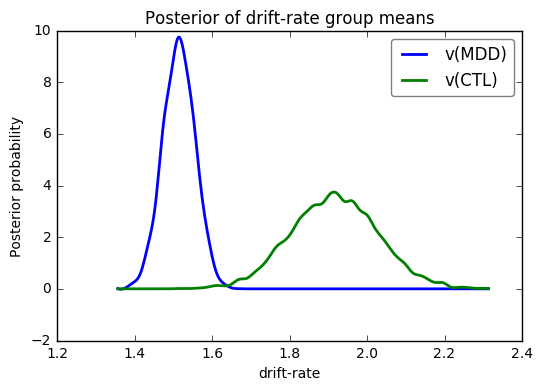

In [6]:
v_MDD, v_CTL = m_stim.nodes_db.node[['v(MDD)','v(CTL)']]
hddm.analyze.plot_posterior_nodes([v_MDD, v_CTL])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.savefig('ctl_mdd_drift_rate_more_samples.pdf')

print ("P_v(MDD > CTL) = ", (v_MDD.trace() > v_CTL.trace()).mean())
print ("P_v(CTL > MDD) = ", (v_CTL.trace() > v_MDD.trace()).mean())

('P_a(MDD > CTL) = ', 0.9966666666666667)
('P_a(CTL > MDD) = ', 0.0033333333333333335)


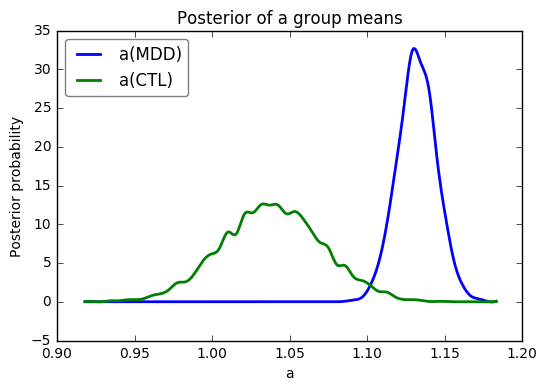

In [7]:
a_MDD, a_CTL = m_stim.nodes_db.node[['a(MDD)','a(CTL)']]
hddm.analyze.plot_posterior_nodes([a_MDD, a_CTL])
plt.xlabel('a')
plt.ylabel('Posterior probability')
plt.title('Posterior of a group means')
plt.savefig('ctl_mdd_a_more_samples.pdf')

print ("P_a(MDD > CTL) = ", (a_MDD.trace() > a_CTL.trace()).mean())
print ("P_a(CTL > MDD) = ", (a_CTL.trace() > a_MDD.trace()).mean())

**this seems good, it's not just motor slowing**

('P_t(MDD > CTL) = ', 0.30677777777777776)
('P_t(CTL > MDD) = ', 0.69322222222222218)


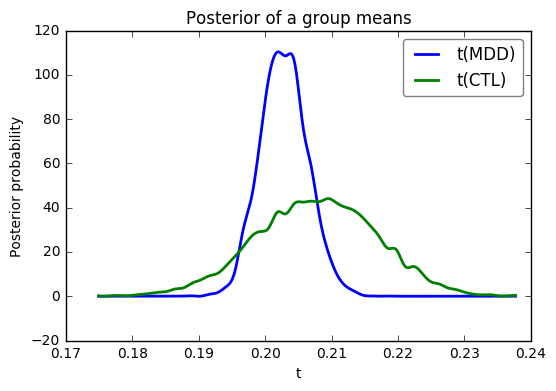

In [8]:
t_MDD, t_CTL = m_stim.nodes_db.node[['t(MDD)','t(CTL)']]
hddm.analyze.plot_posterior_nodes([t_MDD, t_CTL])
plt.xlabel('t')
plt.ylabel('Posterior probability')
plt.title('Posterior of a group means')
plt.savefig('ctl_mdd_a_more_samples.pdf')

print ("P_t(MDD > CTL) = ", (t_MDD.trace() > t_CTL.trace()).mean())
print ("P_t(CTL > MDD) = ", (t_CTL.trace() > t_MDD.trace()).mean())

**Looking at just the lean trials**

In [9]:
lean = hddm.load_csv('hddm_all_lean.csv')
lean['rt'] = lean['rt'] / 1000
lean.rt.head()

0    0.414
1    0.416
2    0.509
3    0.438
4    0.396
Name: rt, dtype: float64

In [10]:
m_lean = hddm.HDDM(lean, depends_on={'v': 'feasibility', 'a': 'feasibility', 't':'feasibility'})
m_lean.find_starting_values()
m_lean.sample(10000, burn=1000)

 [-----------------100%-----------------] 10001 of 10000 complete in 3241.4 sec

('P_v(MDD > CTL) = ', 0.011444444444444445)
('P_v(CTL > MDD) = ', 0.98855555555555552)


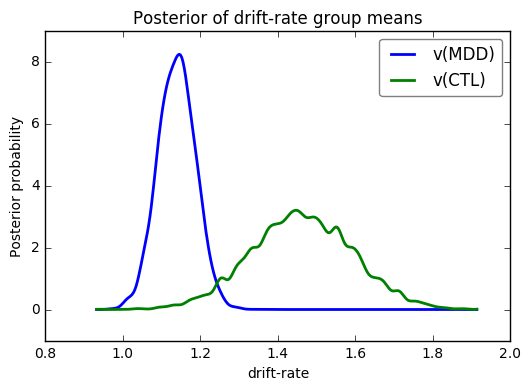

In [11]:
#drift rate
v_MDD, v_CTL = m_lean.nodes_db.node[['v(MDD)','v(CTL)']]
hddm.analyze.plot_posterior_nodes([v_MDD, v_CTL])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.savefig('ctl_mdd_drift_rate_more_samples.pdf')

print ("P_v(MDD > CTL) = ", (v_MDD.trace() > v_CTL.trace()).mean())
print ("P_v(CTL > MDD) = ", (v_CTL.trace() > v_MDD.trace()).mean())

('P_a(MDD > CTL) = ', 0.995)
('P_a(CTL > MDD) = ', 0.0050000000000000001)


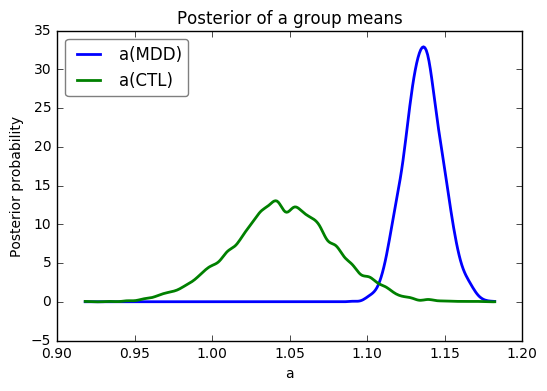

In [12]:
# decision threshold
a_MDD, a_CTL = m_lean.nodes_db.node[['a(MDD)','a(CTL)']]
hddm.analyze.plot_posterior_nodes([a_MDD, a_CTL])
plt.xlabel('a')
plt.ylabel('Posterior probability')
plt.title('Posterior of a group means')
plt.savefig('ctl_mdd_a_more_samples.pdf')

print ("P_a(MDD > CTL) = ", (a_MDD.trace() > a_CTL.trace()).mean())
print ("P_a(CTL > MDD) = ", (a_CTL.trace() > a_MDD.trace()).mean())

('P_t(MDD > CTL) = ', 0.23744444444444446)
('P_t(CTL > MDD) = ', 0.76255555555555554)


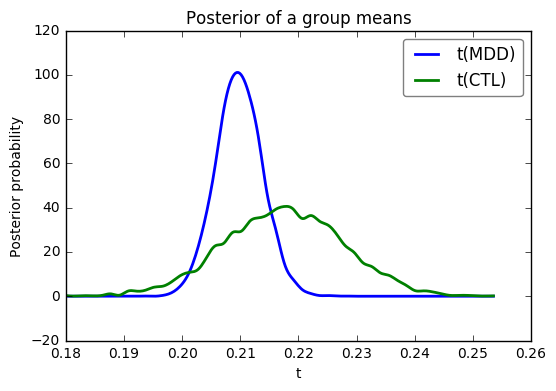

In [13]:
t_MDD, t_CTL = m_lean.nodes_db.node[['t(MDD)','t(CTL)']]
hddm.analyze.plot_posterior_nodes([t_MDD, t_CTL])
plt.xlabel('t')
plt.ylabel('Posterior probability')
plt.title('Posterior of a group means')
plt.savefig('ctl_mdd_a_more_samples.pdf')

print ("P_t(MDD > CTL) = ", (t_MDD.trace() > t_CTL.trace()).mean())
print ("P_t(CTL > MDD) = ", (t_CTL.trace() > t_MDD.trace()).mean())

**Looking at just block 1...**

In [24]:
block_1 = hddm.load_csv('hddm_all_block1.csv')
block_1['rt'] = block_1['rt'] / 1000

m_block_1 = hddm.HDDM(block_1, depends_on={'v': 'feasibility', 'a': 'feasibility', 't':'feasibility'})
m_block_1.find_starting_values()
m_block_1.sample(10000, burn=1000)

 [-----------------100%-----------------] 10001 of 10000 complete in 3274.6 sec

('P_v(MDD > CTL) = ', 0.00011111111111111112)
('P_v(CTL > MDD) = ', 0.99988888888888894)


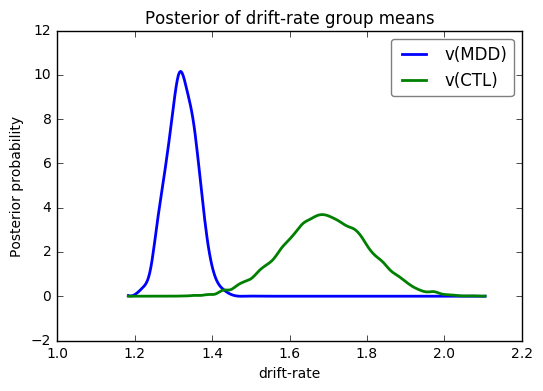

In [25]:
v_MDD, v_CTL = m_block_1.nodes_db.node[['v(MDD)','v(CTL)']]
hddm.analyze.plot_posterior_nodes([v_MDD, v_CTL])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.savefig('ctl_mdd_drift_rate_more_samples.pdf')

print ("P_v(MDD > CTL) = ", (v_MDD.trace() > v_CTL.trace()).mean())
print ("P_v(CTL > MDD) = ", (v_CTL.trace() > v_MDD.trace()).mean())

('P_a(MDD > CTL) = ', 0.999)
('P_a(CTL > MDD) = ', 0.001)


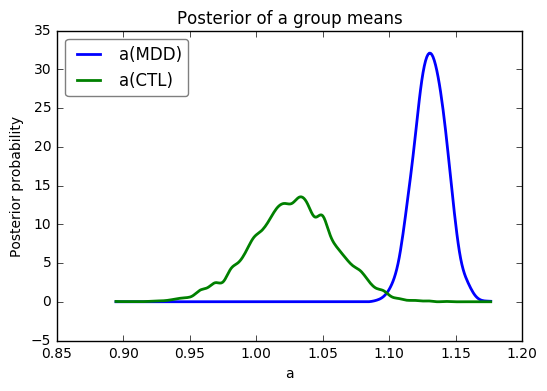

In [26]:
a_MDD, a_CTL = m_block_1.nodes_db.node[['a(MDD)','a(CTL)']]
hddm.analyze.plot_posterior_nodes([a_MDD, a_CTL])
plt.xlabel('a')
plt.ylabel('Posterior probability')
plt.title('Posterior of a group means')
plt.savefig('ctl_mdd_a_more_samples.pdf')

print ("P_a(MDD > CTL) = ", (a_MDD.trace() > a_CTL.trace()).mean())
print ("P_a(CTL > MDD) = ", (a_CTL.trace() > a_MDD.trace()).mean())

('P_t(MDD > CTL) = ', 0.32533333333333331)
('P_t(CTL > MDD) = ', 0.67466666666666664)


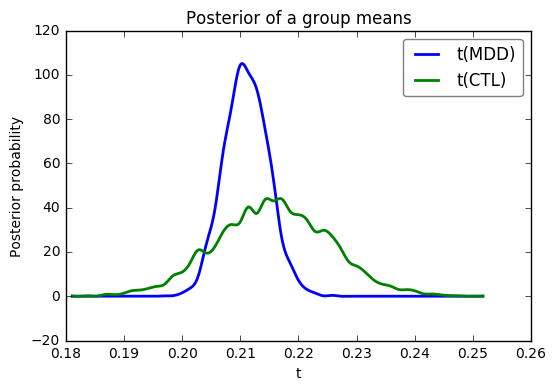

In [27]:
t_MDD, t_CTL = m_block_1.nodes_db.node[['t(MDD)','t(CTL)']]
hddm.analyze.plot_posterior_nodes([t_MDD, t_CTL])
plt.xlabel('t')
plt.ylabel('Posterior probability')
plt.title('Posterior of a group means')
plt.savefig('ctl_mdd_a_more_samples.pdf')

print ("P_t(MDD > CTL) = ", (t_MDD.trace() > t_CTL.trace()).mean())
print ("P_t(CTL > MDD) = ", (t_CTL.trace() > t_MDD.trace()).mean())

**Looking at just block 2...**

In [ ]:
block_2 = hddm.load_csv('hddm_all_block2.csv')
block_2['rt'] = block_2['rt'] / 1000

m_block_2 = hddm.HDDM(block_2, depends_on={'v': 'feasibility', 'a': 'feasibility', 't':'feasibility'})
m_block_2.find_starting_values()
m_block_2.sample(10000, burn=1000)

 [-----------------83%-----------       ] 8369 of 10000 complete in 2711.7 sec

**Trying out the fancy stuff. This takes a while so leaving it overnight.**

In [21]:
all_trial = hddm.load_csv('try_for_hddm.csv')
all_trial['rt'] = all_trial['rt'] / 1000

m_all_factors = hddm.HDDMRegressor(all_trial, ['v ~ length', 'a ~ length'], depends_on = {'v': 'feasibility', 'a': 'feasibility'})
m_all_factors.sample(1000, burn=100)

Adding these covariates:
['v_Intercept', 'v_length[T.short]']
Adding these covariates:
['a_Intercept', 'a_length[T.short]']
 [                  0%                  ] 2 of 1000 complete in 38.8 secHalting at iteration  1  of  1000
Could not generate output statistics for t_subj(CTL).MG0081
Could not generate output statistics for a_Intercept_subj(MDD).CU0119
Could not generate output statistics for a_Intercept_subj(MDD).UM0080
Could not generate output statistics for t_subj(MDD).TX0156
Could not generate output statistics for a_Intercept_subj(MDD).TX0079
Could not generate output statistics for v_Intercept_subj(MDD).CU0066
Could not generate output statistics for a_Intercept_subj(MDD).CU0090
Could not generate output statistics for v_Intercept_subj(MDD).TX0059
Could not generate output statistics for v_Intercept_subj(MDD).CU0050
Could not generate output statistics for t_subj(CTL).MG0006
Could not generate output statistics for v_Intercept_subj(MDD).CU0059
Could not generate output stat

TypeError: 'NoneType' object has no attribute '__getitem__'

**Getting model parameters**

In [33]:
rich_stats = m_stim.gen_stats()
rich_stats.to_csv('rich_only_stats.csv')

In [37]:
lean_stats = m_lean.gen_stats()
lean_stats.to_csv('lean_only_stats.csv')

In [38]:
block1_stats = m_block_1.gen_stats()
block1_stats.to_csv('block1_stats.csv')

In [8]:
print (hddm.__version__)

0.6.0


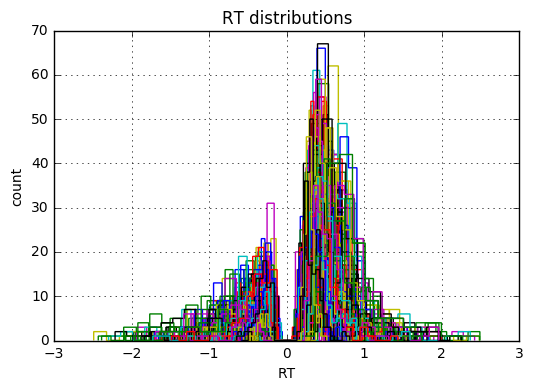

In [9]:
#flip error RTs so they become negative
data = hddm.utils.flip_errors(data)

#plot the RTs and save them 
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'): 
    subj_data.rt.hist(bins=30, histtype='step', ax=ax)
plt.savefig('RT_dist.pdf')

In [10]:
del data['Unnamed: 0']
data.head()

,subj_idx,rt,response,length,block,feasibility
0,MG0006,-0.704,0,short,1.0,CTL
1,MG0006,0.414,1,long,1.0,CTL
2,MG0006,0.456,1,short,1.0,CTL
3,MG0006,0.416,1,long,1.0,CTL
4,MG0006,-0.490,0,short,1.0,CTL


In [44]:
data['subj_idx'] = data['subject_x']

In [45]:
data.rt.dtype

dtype('float64')

In [46]:
data.response.dtype

dtype('int64')

In [47]:
data.subj_idx.dtype

dtype('int64')

In [11]:
m=hddm.HDDM(data)

In [12]:
m.find_starting_values()
m.sample(2000, burn=20)

/Users/python2/anaconda/lib/python2.7/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 2001 of 2000 complete in 770.2 sec

In [22]:
m.

AttributeError: 'HDDM' object has no attribute 'mean'

In [19]:
m

In [ ]:
data = hddm.load_csv('all_trial_first_session_cleaned_merged.csv')
data['rt'] = data['rt'] / 1000
data.rt.head()

In [ ]:
dmatrix("C(length, Treatment ('short'))", data)
m_within_subj = hddm.HDDMRegressor(data, "v ~ C(length, Treatment ('short'))")
m_within_subj.sample(500, burn=20)

In [ ]:
stats = m_within_subj.gen_stats()
#stats[stats.index.isin(['a', 'a_std', 'a_subj.MG0001', 'a_subj.MG0002', 'v'])]